In [1]:
# Some stuff that may or may not be necessary need to clean this up later  
import sys
sys.path.append('../')

# Set options to allow for better display in the iPython notebook
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline
plt.rcParams.update({'figure.figsize':[12,10]})
plt.rcParams['font.family'] = 'Arial'
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 50

import warnings
warnings.filterwarnings('ignore')

<center>**PESTools - A Python toolkit for processing PEST-related information**</center>  <br>

<center>Evan G. Christianson<sup>1</sup>, Andrew T. Leaf<sup>2</sup></center>
<center><sup>1</sup>Barr Engineering, echristianson@barr.com, Minneapolis, MN, USA</center>
<center><sup>2</sup>USGS – Wisconsin Water Science Center, aleaf@usgs.gov, Madison, WI, USA</center>  

<center>**ABSTRACT**</center>

PESTools is an open-source Python package for processing and visualizing information associated with the parameter estimation software PEST and PEST++.  While PEST output can be reformatted for post-processing in spreadsheets or other menu-driven software packages, that approach can be error-prone and time-consuming. Managing information from highly parameterized models with thousands of parameters and observations presents additional challenges. PESTools consists of a set of Python object classes to facilitate efficient processing and visualization of PEST-related information. Processing and visualization of observation residuals, objective function contributions, parameter and observation sensitivities, parameter correlation and identifiability, and other common PEST outputs have been implemented. PESTools is integrated with the pyemu software package for linear-based computer model uncertainty analyses, allowing for efficient computations using the Jacobian Matrix without any external utilities or files. The use of dataframe objects (pandas Python package) facilitates rapid subsetting and querying of large datasets, as well as the incorporation of ancillary information such as observation locations, times, measurement types, and other associated information. PESTools’ object methods can be easily scripted with concise code, or alternatively, the use of IPython notebooks allows for live interaction with the information. PESTools is designed to streamline workflows and provide deeper insight into model behavior, enhance troubleshooting, and improve transparency in the calibration process.

<center>**INTRODUCTION**</center>

In recent years the PEST software suite (Doherty, 2010a: Doherty, 2010b) has become the industry standard for calibrating groundwater flow models and evaluating uncertainty in their predictions. However, many challenges remain in using PEST, especially for highly parameterized models. Calibration of highly-parameterized models typically requires managing large volumes of information spread across numerous input and output files. This information may provide valuable insight, but can be difficult or impossible to effectively visualize without custom programming. PESTools aims to provide a central platform for managing and visualizing information from PEST and PEST++ (Welter et al, 2012), which minimizes the number of intermediate files and custom code required for parameter estimation workflows.  

<center>**DEMONSTRATION**</center>

PESTools is designed with flexibility in mind. Data are manipulated using Python object classes, allowing interactive exploration or through simple, customizable scripting. Reading and writing of the PEST control and Jacobian files and linear algebra computations (e.g. parameter identifiability) are performed using the pyemu Python package (White, 2015). PESTools stores and/or returns information in Python dictionaries, pandas dataframes (http://pandas.pydata.org/), and Matplotlib plots (http://matplotlib.org/), allowing for easy interrogation of the information and customized visualizations.

Some examples of PESTools’ capabilities are presented below, including the code (indicated by courier font; user-supplied arguments are in red type) used to generate the tables and figures. In most instances only one or two lines of code are needed to quickly generate useful output. Additional documentation, example datasets, and interactive tutorials using IPython notebooks (http://ipython.org/notebook.html) are available on the project webpage at https://github.com/PESTools.



At the top level of PESTools is the Pest class.  A Pest class instance is created by providing the path and base name of a PEST run.


In [2]:
import pestools
example = pestools.Pest('../cc/Columbia')

From the Pest class the user has access to numerous PEST related inputs and outputs, most commonly returned in the form of a pandas dataframe.

In [3]:
example.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
0,kpkpx_tc2,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
1,kpkpx_tc3,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
2,kpkpx_tc4,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
3,kpkpx_tc7,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
4,kpkpx_tc8,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
...,...,...,...,...,...,...,...,...,...,...
592,r_cr,none,factor,1.00,1.000000e-01,1.000000e+01,rech,1,0,1
593,r_gg,none,factor,1.00,1.000000e-01,1.000000e+01,rech,1,0,1
594,r_lc,none,factor,1.00,1.000000e-01,1.000000e+01,rech,1,0,1
595,sfrc,log,factor,1.00,1.000000e-10,1.000000e+10,sfr_cond,1,0,1


**_Table 1. Parameter data section of a PEST control file presented as a pandas dataframe.  Per pandas conventions the middle section of the dataframe are excluded from view but are accessible using standard pandas methods._**

In [4]:
example.observation_data

,obsnme,obsval,weight,obgnme
obsnme,,,,
7089222501_b,7089222501_b,858.13,0.200000,head_best
1089192101_b,1089192101_b,893.24,0.200000,head_best
2089103101_b,2089103101_b,924.60,0.200000,head_best
3089103201_b,3089103201_b,911.44,0.200000,head_best
2089475301_b,2089475301_b,729.25,0.200000,head_best
...,...,...,...,...
5406328_marshcr,5406328_marshcr,98200.00,0.000020,headwaters
5405820_wiscons,5405820_wiscons,75700.00,0.000026,headwaters
ccsg12_beavercr,ccsg12_beavercr,55500.00,0.000018,cc_streams


**_Table 2. Observation data section of a PEST control file presented as a pandas dataframe._**

Following a PEST run, residual information can be read in, from a single .res file, or set of .rei files containing residual information by iteration. Ancillary observation information such as spatial coordinates, date/time, or measurement type can be read in from an observation information file.

In [5]:
residuals = example.res('../cc/columbia_svda.rei.16', obs_info_file = '../cc/observation_locations.csv')

Numerous plotting options are available for residual information, which can be visualized categorically (by group as defined in the PEST control file or by other classifications in the observation information file). 

(<matplotlib.figure.Figure at 0x10ae5ced0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10b724f50>)

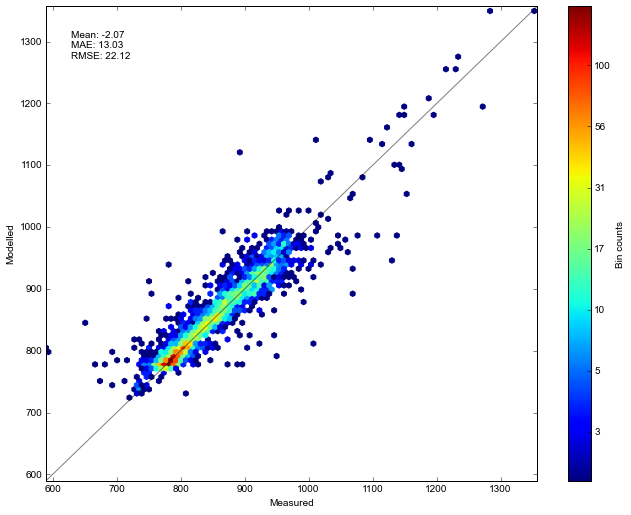

In [6]:
residuals.plot_hexbin(['head_fair','wcrs1'],print_stats=['Mean','MAE','RMSE'])

**_Figure 1. Plot of measured vs modelled values in the form of a hexbin plot.  Hexbin plots are a 2D histogram; the color of each hexagon indicates the number of observations that fall within the space occupied by the hexagon.  Warmer colors indicate more observations.  Hexbin plots are useful when observations number in the thousands._**

Plotting methods in PESTools provide default plotting behavior; additional customization can be obtained by supplying keyword arguments to the underlying matplotlib methods (e.g. color='k').

(<matplotlib.figure.Figure at 0x105197dd0>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ccc3710>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x10d3d0110>]], dtype=object))

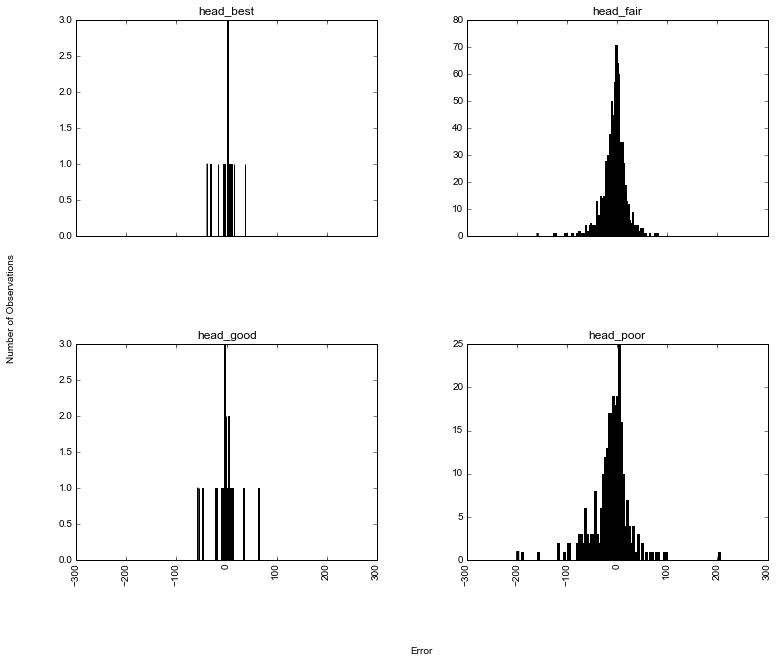

In [7]:
residuals.plot_hist(groupinfo=['head_best', 'head_good', 'head_fair', 'head_poor'], color='k')

**_Figure 2.  Histograms of residuals. Each histogram represents an individual observation group._**

PESTools uses the binary Jacobian matrix writen by PEST and the weights recorded in the residuals file to calculate parameter sensitivities.  Sensitivities can be recalculated with specific observations, or observation groups, removed.

(<matplotlib.figure.Figure at 0x11288f250>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11288f5d0>)

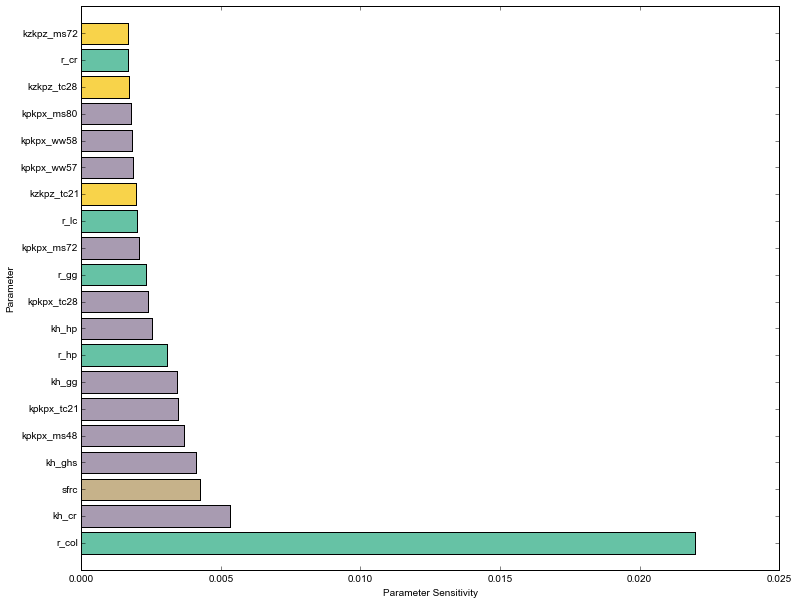

In [8]:
parsen = example.ParSen(drop_regul=True)
# Note: in the official manuscript the above line was: example.ParSen(r'../cc/Columbia', drop_regul=True)
# that was incorrect, the base name is already known and part of the Pest class (example)
parsen.plot(n=20)

**_Figure 3.  Plot of the 20 most sensitive parameters.  Each color indicates a separate parameter group as defined in the PEST control file._**

The Cor class of PESTools handles calculation and plotting of parameter correlations.

(<matplotlib.figure.Figure at 0x10b1f3e50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10b1e7090>)

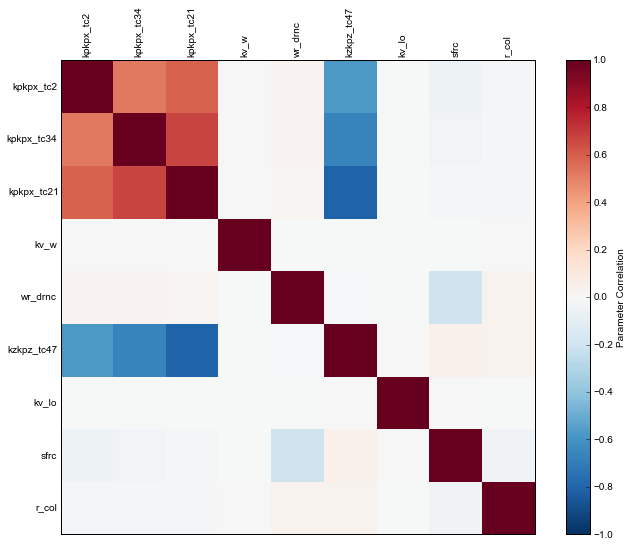

In [9]:
cor = example.cor
cor.plot_heatmap(par_list=['kpkpx_tc2', 'kpkpx_tc34', 'kpkpx_tc21', 'kv_w', 'wr_drnc', 'kzkpz_tc47', 'kv_lo', 'sfrc', 'r_col'])

**_Figure 4.  Heatmap of parameter correlation values for a select number of parameters._**

The Identpar class produces visualizations of parameter identifiability (Doherty and Hunt, 2009), a qualitative indicator that describes the extent to which individual parameters are constrained by the observation data. In comparison to parameter sensitivity, identifiability is advantageous in that it accounts for both parameter sensitivity and correlation between parameters. Values of identifiability range from 0 (not informed by the observation data) to 1 (fully informed by the observation data). In sparsely parameterized models (or those that have a relatively small soluton space), identifiabilities can be visualized in decreasing order using a stacked bar chart

2015-06-01 15:43:50.030040 starting: pre-loading base components
2015-06-01 15:43:50.030124 starting: loading jco: ../cc/Columbia.jco
2015-06-01 15:43:50.075100 finished: loading jco: ../cc/Columbia.jco took: 0:00:00.044976
2015-06-01 15:43:50.075162 starting: loading pst: ../cc/Columbia.pst
2015-06-01 15:43:50.112987 finished: loading pst: ../cc/Columbia.pst took: 0:00:00.037825
2015-06-01 15:43:50.113362 starting: loading parcov
2015-06-01 15:43:50.194096 finished: loading parcov took: 0:00:00.080734
2015-06-01 15:43:50.194486 starting: loading obscov
2015-06-01 15:43:50.494349 finished: loading obscov took: 0:00:00.299863
2015-06-01 15:43:50.494720 finished: pre-loading base components took: 0:00:00.464680
2015-06-01 15:43:50.496291 starting: qhalf
2015-06-01 15:43:50.502599 finished: qhalf took: 0:00:00.006308


(<matplotlib.figure.Figure at 0x10b8f3550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10b8f3990>)

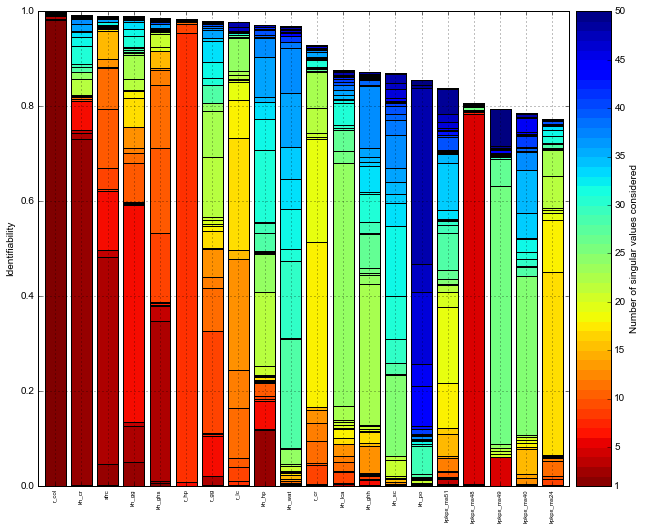

In [10]:
ip = example.IdentPar(par_info_file='../cc/parinfo.csv')
# Line as in official paper, works but redundant
#ip = example.IdentPar('../cc/columbia.jco',par_info_file='../cc/parinfo.csv') 
ip.plot_bar(nsingular=50)

**_Figure 5. Stacked bar chart showing the 20 most identifiable parameters from a highly parameterized model, based on a solution space of 50 singular values. The colors indicate identifiability that is gained by the addition of singular values to the solution space. For example, the recharge parameter on the far left (r_col) is almost fully identifiable with only one singular value, therefore it is well-constrained by the observation data._**

In highly parameterized models, however, the solution space may contain hundreds of parameters, which in groundwater modeling are typically distributed spatially. In this case, identifiability may be better visualized on a map. PESTools can plot total identifiabilities (equivalent to the total height of the bars in Figure 5) spatially for a selected group of parameters. The location coordinates of each parameter are supplied to PESTools in csv format via a parameter information file (as shown above). Figure 6 shows the total identifiabilities for pilot points in zone 15

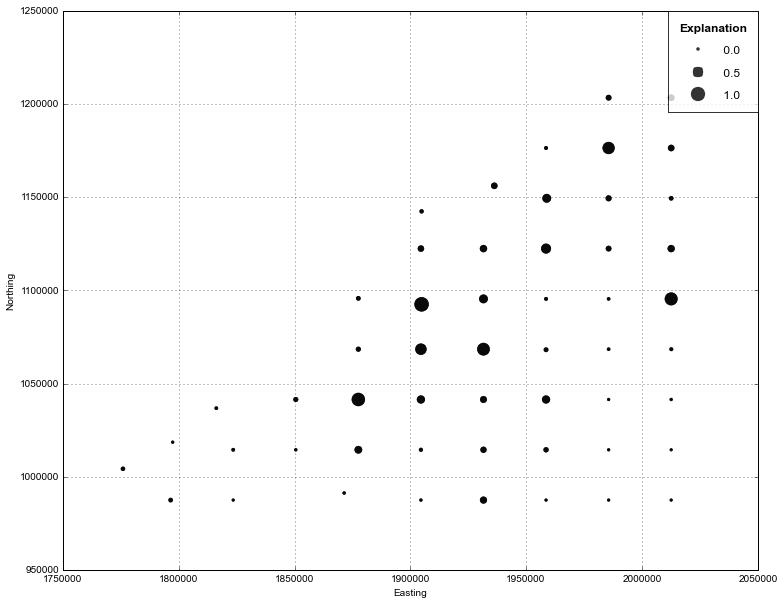

In [13]:
ip.plot_spatial(nsingular=50, group_col='zone', groupinfo=15)

**_Figure 6. Map of pilot point total identifiability values for a given zone in a highly parameterized model. The large circles indicate identifiabilities close to 1; the smallest points indicate identifiabilities close to 0._**

<center>**SUMMARY AND FUTURE WORK**</center>

PESTools is an open-source package aimed at leveraging the data analysis and visualization capabilities of Python to streamline parameter estimation workflows, allowing for deeper insight into model behavior, enhanced troubleshooting, and improved transparency in the calibration process. PESTools is a work in progress. It can be downloaded at https://github.com/PESTools. Additional features are being developed, including adjustment of observation weights and group assignments, support for the inclusion of GIS data in map figures, and expanded integration with the linear analysis capabilities of pyemu. Many additional capabilities are possible. We encourage contributions to the project via GitHub.

<center>**ACKNOWLEDGMENTS**</center>

Jeremey White, Mike Fienen, Jonathon Carter, and Dave Dahlstrom have all contributed to this project through code development or testing.  Their participation is greatly appreciated. The use of trade names is for identification purposes and does not constitute endorsement by the U.S. Geological Survey.

<center>**REFERENCES**</center>

Doherty, J., 2010a, PEST, Model-independent parameter estimation—User manual (5th ed., with slight additions): Brisbane, Australia, Watermark Numerical Computing, accessed November 13, 2014 at http://www.pesthomepage.org/.

Doherty, J., 2010b, PEST, Model Independent Parameter Estimation. Addendum to User Manual (5th Edition): Brisbane, Australia, Watermark Numerical Computing, accessed November 13, 2014 at http://www.pesthomepage.org/.

Doherty, J., and Hunt, R.J., 2009. Two statistics for evaluating parameter identifiability and error reduction, Journal of Hydrology 366 (2009), 119–127. doi:10.1016/j.jhydrol.2008.12.018.

Welter, D.E., Doherty, J.E., Hunt, R.J., Muffels, C.T., Tonkin, M.J., and Schreüder, W.A., 2012, Approaches in highly parameterized inversion: PEST++, a Parameter ESTimation code optimized for large environmental models. USGS Techniques and Methods, book 7, section C5, 47 p.

White, J.T., 2015. Pyemu: linear-based computer model uncertainty analyses. Accessed April 6, 2015, at https://github.com/jtwhite79/pyemu. 
